# Dragon Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\swap8\Real estate price\\housing.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

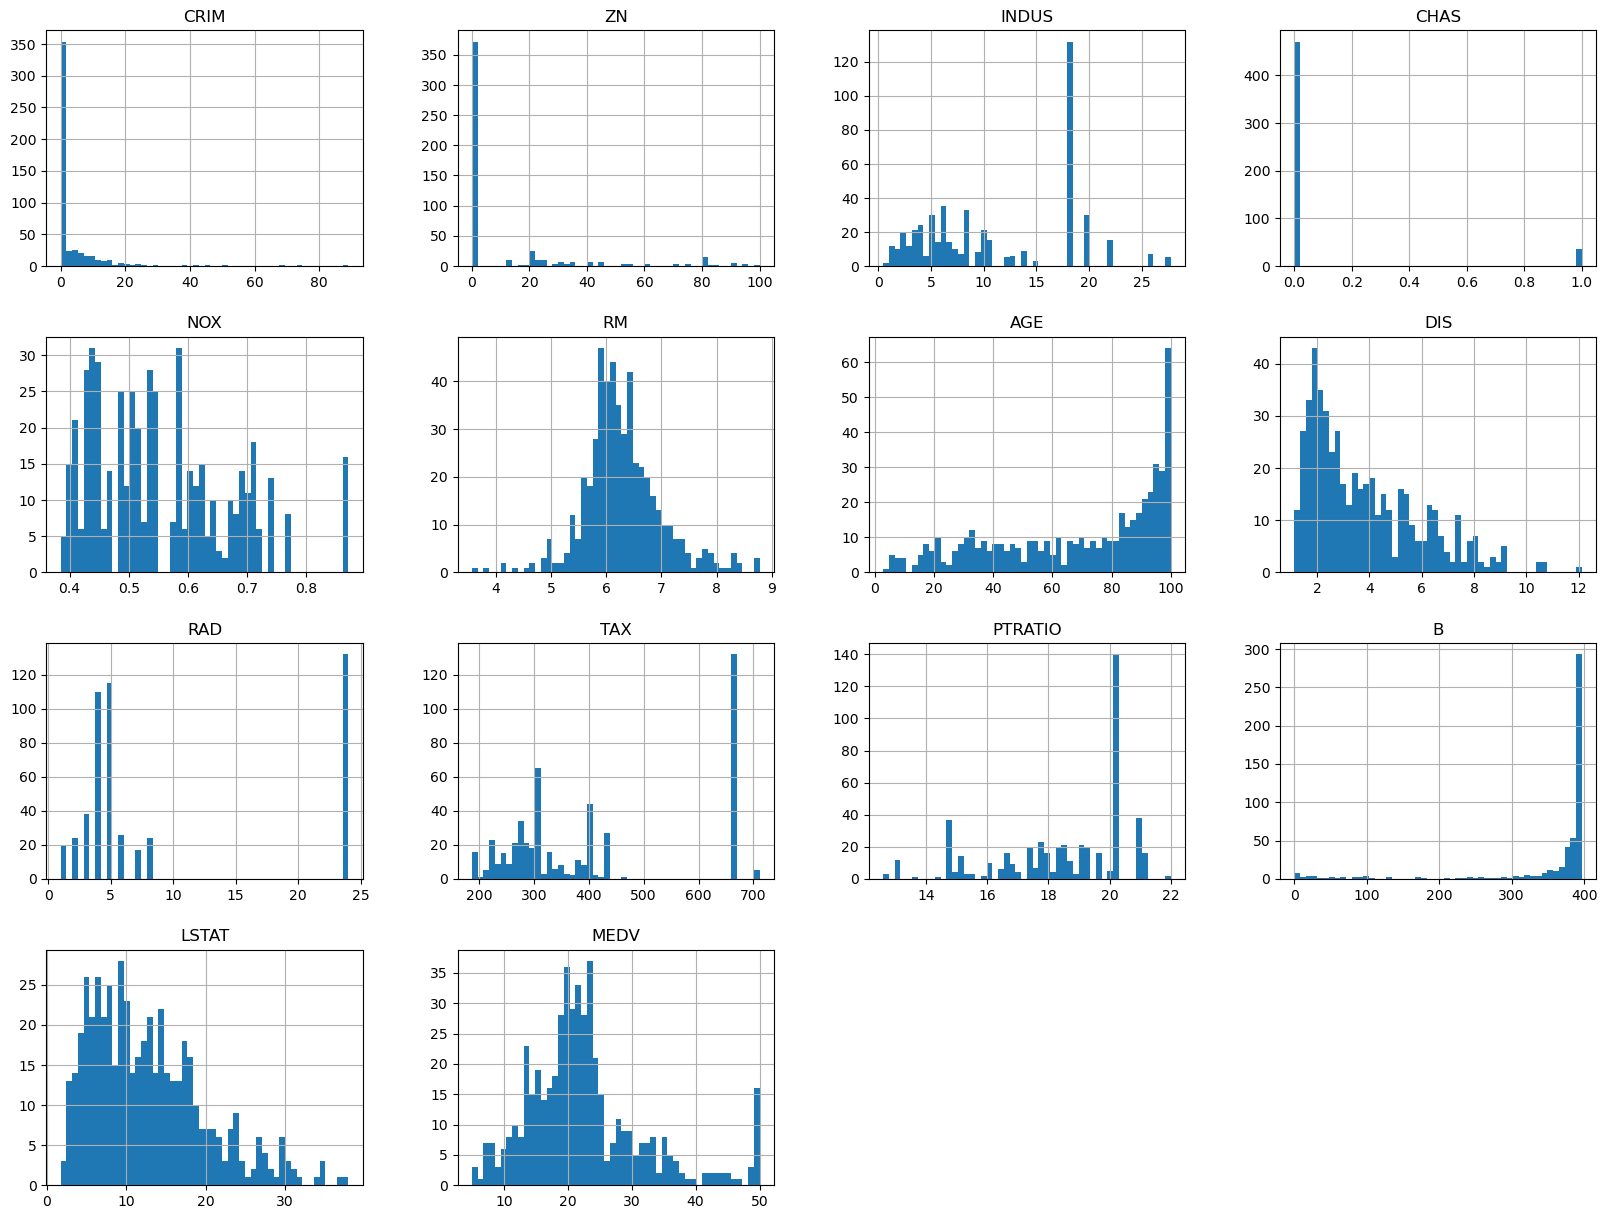

In [6]:
df.hist(bins=50,figsize=(20,15))

In [7]:
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    train_indices = shuffled[:test_set_size]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:  {len(test_set)}\n")

Rows in train set: 404
Rows in test set:  102



In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [12]:
 strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
df=strat_train_set.copy()

In [14]:
corr_matrix= df.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686123
ZN         0.333173
B          0.311240
DIS        0.222076
CHAS       0.207772
AGE       -0.336123
RAD       -0.386387
CRIM      -0.396302
NOX       -0.416011
TAX       -0.482972
INDUS     -0.483676
PTRATIO   -0.497808
LSTAT     -0.737963
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

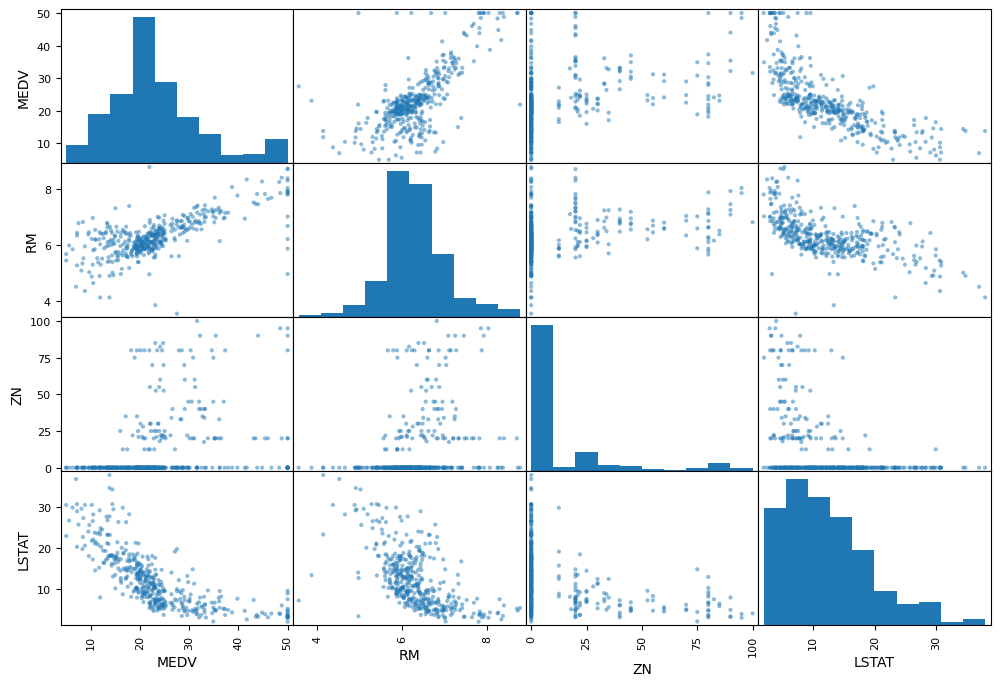

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

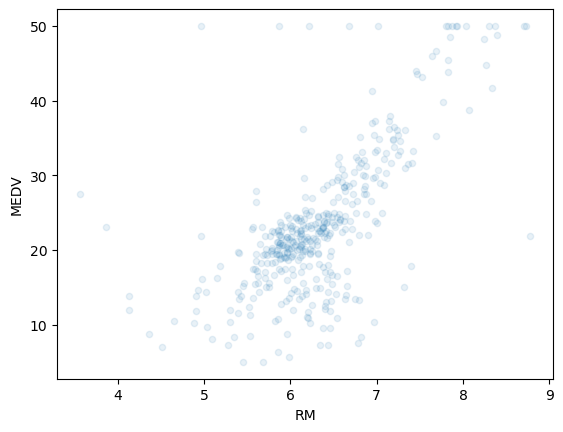

In [17]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.1)

In [18]:
df["TAXIM"] = df['TAX']/df['RM']

In [19]:
df["TAXIM"]

313     48.515800
444    113.768364
356    107.211848
36      47.765794
27      50.768976
          ...    
163     48.119403
348     42.200452
279     31.708749
314     46.292066
349     48.277850
Name: TAXIM, Length: 404, dtype: float64

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXIM
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,21.6,48.515800
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8,113.768364
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,107.211848
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0,47.765794
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8,50.768976


In [21]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686123
ZN         0.333173
B          0.311240
DIS        0.222076
CHAS       0.207772
AGE       -0.336123
RAD       -0.386387
CRIM      -0.396302
NOX       -0.416011
TAX       -0.482972
INDUS     -0.483676
PTRATIO   -0.497808
TAXIM     -0.543541
LSTAT     -0.737963
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

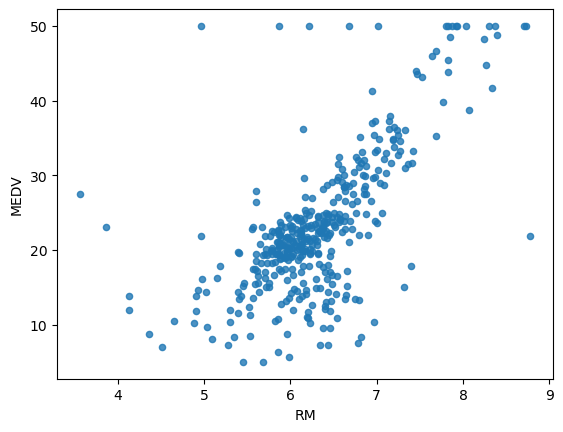

In [22]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [23]:
df=strat_train_set.drop("MEDV",axis=1)
df_labels=strat_train_set["MEDV"].copy()

In [24]:
a=df.dropna(subset=["RM"])
a.shape

(404, 13)

In [25]:
median = df["RM"].median()

In [26]:
df["RM"].fillna(median)

313    6.266
444    5.854
356    6.212
36     5.841
27     6.047
       ...  
163    8.375
348    6.635
279    6.812
314    6.567
349    6.939
Name: RM, Length: 404, dtype: float64

In [27]:
df.shape

(404, 13)

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.313577,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.724737,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.896250,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.229500,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.650500,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.18480e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.28000e-01,
       6.22950e+00, 7.34500e+01, 3.20745e+00, 5.00000e+00, 3.29000e+02,
       1.87000e+01, 3.91955e+02, 1.06650e+01])

In [31]:
X=imputer.transform(df)

In [32]:
df_tr = pd.DataFrame(X,columns=df.columns)

In [33]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.313577,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.724737,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.896250,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.229500,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.650500,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [35]:
df_num_tr = my_pipeline.fit_transform(df_tr)

In [36]:
df_num_tr 

array([[-0.37714436, -0.49473328, -0.15029298, ...,  0.03714646,
         0.37756738, -0.61721356],
       [ 0.97485937, -0.49473328,  1.0355843 , ...,  0.8582074 ,
        -1.4850126 ,  1.63193751],
       [ 0.5628435 , -0.49473328,  1.0355843 , ...,  0.8582074 ,
         0.18676472,  0.75577356],
       ...,
       [-0.38350905,  0.36006088, -1.10044099, ..., -1.55936092,
         0.4203335 , -1.04892601],
       [-0.36637615, -0.49473328, -0.15029298, ...,  0.03714646,
         0.40559076, -0.42188137],
       [-0.40307671,  1.21485505, -1.40124889, ...,  0.63013491,
         0.33443575, -0.90171914]])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model= LinearRegression()
model.fit(df_num_tr,df_labels )

LinearRegression()

In [38]:
some_data = df.iloc[:5]

In [39]:
some_labels = df_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([26.166247  , 11.32167273, 20.00304298, 22.6597735 , 14.53284849])

In [42]:
list(some_labels)

[21.6, 10.8, 17.8, 20.0, 14.8]

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [44]:
lin_mse

22.936041730707966

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,df_num_tr,df_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores 

array([5.48674675, 6.68350233, 5.06499171, 3.9448039 , 3.86218824,
       6.07122624, 4.29345871, 3.60655302, 4.59994613, 5.85692873])

In [47]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [48]:
print_scores(rmse_scores)

Scores: [5.48674675 6.68350233 5.06499171 3.9448039  3.86218824 6.07122624
 4.29345871 3.60655302 4.59994613 5.85692873]
Mean: 4.947034575593711
Standard deviation: 0.9969011059415532


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(df_num_tr,df_labels)

RandomForestRegressor()

In [50]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

In [51]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse= np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[21.576 12.148 18.433 20.462 26.603 21.138 18.375 23.027 14.281 33.559
 12.368 39.11  21.731 15.191 34.681 19.785 16.978 20.239 28.652 15.542
 21.212 21.864 22.19   9.617 19.437 16.586 20.635 26.862 18.982 19.604
 18.392 20.421 44.212 27.536 16.45  16.94  20.122 19.586 45.04  26.211
 16.447 35.787 16.874 21.694 22.906 20.107 21.22  23.474 22.485  8.627
 10.46  16.637 15.355 21.103 33.985  8.332 15.107 16.876  9.614 12.763
 20.285 18.97  19.584 14.626 15.612 25.796 19.846 24.008 17.102 24.192
 20.079 15.532 20.067 20.366 21.013 29.609 16.549 32.852 46.725 19.263
 18.243 23.694 23.089 15.239 17.564 14.835 22.729 15.119 25.459 22.135
 17.152 15.959 23.158 15.451 15.699 23.857 20.905 17.35  22.889 19.14
 15.441 17.494] [18.5, 12.8, 16.8, 18.9, 28.0, 20.8, 17.6, 22.3, 14.9, 32.9, 8.5, 42.8, 20.2, 23.2, 33.4, 16.8, 11.7, 19.0, 26.7, 13.8, 20.3, 15.3, 20.6, 8.7, 23.2, 13.1, 24.5, 23.3, 18.6, 18.3, 20.2, 18.4, 42.3, 25.1, 13.3, 20.0, 18.2, 18.8, 50.0, 26.5, 14.5, 36.4, 10.2, 20.5, 22.9, 19.9, 

In [52]:
final_rmse

2.8299972736077774

In [53]:
from joblib import dump,load
model=load('Dragon.joblib')

In [54]:
prepared_data[0]

array([-0.37714436, -0.49473328, -0.15029298, -0.27288841, -0.08365802,
       -0.06572829,  0.54049235, -0.24394412, -0.62035329, -0.58621527,
        0.03714646,  0.37756738, -0.61721356])

In [55]:

features= np.array([[-0.37714436, -0.49473328, -0.15029298, -0.27288841, -0.08365802,
       -0.06572829,  0.54049235, -0.24394412, -0.62035329, -0.58621527,
        0.03714646,  0.37756738, -0.61721356]])
model.predict(features)

array([21.637])